<a href="https://colab.research.google.com/github/HJuliamPR/OracleChallengeTelecomX/blob/main/TelecomX_LATAM_HJPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Telecom X - Análisis de Evasión de Clientes***


Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

¿Qué vas a practicar?

✅ Importar y manipular datos desde una API de manera eficiente.

✅ Aplicar los conceptos de ETL (Extracción, Transformación y Carga) en la preparación de los datos.

✅ Crear visualizaciones estratégicas para identificar patrones y tendencias.

✅ Realizar un Análisis Exploratorio de Datos (EDA) y generar un informe con insights relevantes.

¡Ahora es tu turno! 🚀 Usa tus conocimientos para transformar datos en información estratégica y ayudar a Telecom X a retener más clientes.

#📌 Extracción

In [20]:
import requests
import pandas as pd

# Enlace de la API
api_link = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Cargar datos desde la API
response = requests.get(api_link) # Solicitud en HTTP
data = response.json() # Convertir la respuesta JSON a un diccionario/lista de Python

# Convertir a DataFrame de pandas
df = pd.DataFrame(data)
df = pd.json_normalize(data)
# Mostrar las primeras filas
display(df.head())

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

## Conoce el conjunto de datos

Información del conjunto de datos:

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente


In [21]:
display(df.head())

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [23]:
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

## Comprobación de incoherencias en los datos

In [25]:
# Aplicar el método unique() a cada variable del DataFrame
print("Valores únicos para cada variable del DataFrame:")

for column in df.columns:
    print(f"\nValores únicos en la columna '{column}':")
    display(df[column].unique())


Valores únicos para cada variable del DataFrame:

Valores únicos en la columna 'customerID':


array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], dtype=object)


Valores únicos en la columna 'Churn':


array(['No', 'Yes', ''], dtype=object)


Valores únicos en la columna 'customer.gender':


array(['Female', 'Male'], dtype=object)


Valores únicos en la columna 'customer.SeniorCitizen':


array([0, 1])


Valores únicos en la columna 'customer.Partner':


array(['Yes', 'No'], dtype=object)


Valores únicos en la columna 'customer.Dependents':


array(['Yes', 'No'], dtype=object)


Valores únicos en la columna 'customer.tenure':


array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14,
       35, 64, 39, 40,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 51, 31, 36,
       17, 18, 38, 42,  0])


Valores únicos en la columna 'phone.PhoneService':


array(['Yes', 'No'], dtype=object)


Valores únicos en la columna 'phone.MultipleLines':


array(['No', 'Yes', 'No phone service'], dtype=object)


Valores únicos en la columna 'internet.InternetService':


array(['DSL', 'Fiber optic', 'No'], dtype=object)


Valores únicos en la columna 'internet.OnlineSecurity':


array(['No', 'Yes', 'No internet service'], dtype=object)


Valores únicos en la columna 'internet.OnlineBackup':


array(['Yes', 'No', 'No internet service'], dtype=object)


Valores únicos en la columna 'internet.DeviceProtection':


array(['No', 'Yes', 'No internet service'], dtype=object)


Valores únicos en la columna 'internet.TechSupport':


array(['Yes', 'No', 'No internet service'], dtype=object)


Valores únicos en la columna 'internet.StreamingTV':


array(['Yes', 'No', 'No internet service'], dtype=object)


Valores únicos en la columna 'internet.StreamingMovies':


array(['No', 'Yes', 'No internet service'], dtype=object)


Valores únicos en la columna 'account.Contract':


array(['One year', 'Month-to-month', 'Two year'], dtype=object)


Valores únicos en la columna 'account.PaperlessBilling':


array(['Yes', 'No'], dtype=object)


Valores únicos en la columna 'account.PaymentMethod':


array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)


Valores únicos en la columna 'account.Charges.Monthly':


array([65.6 , 59.9 , 73.9 , ..., 91.75, 68.8 , 67.85])


Valores únicos en la columna 'account.Charges.Total':


array([ 593.3 ,  542.4 ,  280.85, ...,  742.9 , 4627.65, 3707.6 ])

In [26]:
# --- Identificación de problemas en los datos en todas las columnas ---

# Reemplazar valores vacíos en 'Churn' con NaN para ser tratados como ausentes
df['Churn'] = df['Churn'].replace('', pd.NA)

# Identificar valores ausentes en todas las columnas
print("\nCantidad de valores ausentes por columna:")
display(df.isnull().sum())

# Identificar filas duplicadas
print("\nCantidad de filas duplicadas:")
display(df.duplicated().sum())

# Identificar posibles errores de formato e inconsistencias en columnas numéricas
# Convertir columnas de cargos a numérico con errors='coerce' para ver si hay valores no convertibles
print("\nCantidad de valores no convertibles a numérico en 'account.Charges.Total':")
display(pd.to_numeric(df['account.Charges.Total'], errors='coerce').isnull().sum())

print("\nCantidad de valores no convertibles a numérico en 'account.Charges.Monthly':")
display(pd.to_numeric(df['account.Charges.Monthly'], errors='coerce').isnull().sum())


# Identificar inconsistencias en columnas categóricas (valores inesperados más allá de NaN/vacío)
# Esto ya se realizó en parte mostrando valores únicos en la celda m7-ErDcD83To.
# Para una verificación más profunda, se podrían revisar columnas específicas si se sospechan problemas.
# Ejemplo:
# print("\nValores únicos en la columna 'InternetService':")
# display(df['InternetService'].unique())


Cantidad de valores ausentes por columna:


,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0



Cantidad de filas duplicadas:


np.int64(0)


Cantidad de valores no convertibles a numérico en 'account.Charges.Total':


np.int64(11)


Cantidad de valores no convertibles a numérico en 'account.Charges.Monthly':


np.int64(0)

In [27]:
# Filtrar el DataFrame donde 'Churn' es NaN
filas_churn_nan = df[df['Churn'].isnull()]

# Imprimir las primeras cinco filas donde 'Churn' es NaN
print("Primeras 5 filas donde 'Churn' es NaN:")
display(filas_churn_nan.head())

# Obtener la lista de índices donde 'Churn' es NaN
indices_churn_nan = filas_churn_nan.index.tolist()

print("\nLista de índices donde 'Churn' es NaN:")
display(indices_churn_nan)

Primeras 5 filas donde 'Churn' es NaN:


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
30,0047-ZHDTW,<NA>,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,<NA>,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,<NA>,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,<NA>,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,<NA>,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45



Lista de índices donde 'Churn' es NaN:


[30,
 75,
 96,
 98,
 175,
 219,
 312,
 351,
 368,
 374,
 380,
 382,
 395,
 439,
 451,
 495,
 540,
 590,
 640,
 669,
 681,
 739,
 791,
 842,
 876,
 877,
 903,
 912,
 932,
 973,
 992,
 1013,
 1017,
 1160,
 1172,
 1218,
 1236,
 1303,
 1364,
 1366,
 1517,
 1657,
 1705,
 1764,
 1795,
 1805,
 1825,
 1860,
 1883,
 2021,
 2101,
 2138,
 2151,
 2154,
 2158,
 2200,
 2245,
 2264,
 2390,
 2394,
 2429,
 2467,
 2494,
 2576,
 2584,
 2613,
 2627,
 2644,
 2690,
 2726,
 2733,
 2751,
 2879,
 2913,
 2919,
 2945,
 2953,
 2973,
 2989,
 3053,
 3060,
 3076,
 3177,
 3199,
 3202,
 3207,
 3220,
 3249,
 3266,
 3290,
 3300,
 3305,
 3320,
 3365,
 3378,
 3438,
 3468,
 3538,
 3590,
 3617,
 3619,
 3688,
 3724,
 3804,
 3827,
 3833,
 3844,
 3858,
 3900,
 3924,
 3968,
 4021,
 4072,
 4081,
 4128,
 4196,
 4199,
 4282,
 4327,
 4390,
 4393,
 4396,
 4411,
 4413,
 4431,
 4497,
 4541,
 4578,
 4579,
 4599,
 4609,
 4662,
 4665,
 4713,
 4750,
 4753,
 4762,
 4769,
 4778,
 4785,
 4860,
 4918,
 4938,
 4946,
 4976,
 4985,
 4992,
 5001,

In [28]:
# Obtener las filas donde 'account.Charges.Total' es NaN
filas_nan_total_charges = df[df['account.Charges.Total'].isnull()]

# Obtener la lista de índices de estas filas
indices_nan_total_charges = filas_nan_total_charges.index.tolist()

print("Lista de índices donde 'account.Charges.Total' es NaN:")
display(indices_nan_total_charges)

Lista de índices donde 'account.Charges.Total' es NaN:


[975, 1775, 1955, 2075, 2232, 2308, 2930, 3134, 3203, 4169, 5599]

## Manejo de inconsistencias

In [29]:
# Combinar los índices de las filas a eliminar y eliminar duplicados
indices_to_drop = list(set(indices_churn_nan + indices_nan_total_charges))

# Eliminar las filas correspondientes a los índices de la lista
df = df.drop(indices_to_drop)

# Opcional: Verificar la nueva forma del DataFrame después de eliminar las filas
print("Forma del DataFrame después de eliminar filas con NaN en 'Churn' o 'account.Charges.Total':")
display(df.shape)

# Opcional: Verificar que no hay valores NaN en 'Churn' o 'account.Charges.Total'
print("\nCantidad de valores ausentes en 'Churn' después de eliminar filas:")
display(df['Churn'].isnull().sum())


print("\nCantidad de valores ausentes en 'account.Charges.Total' después de eliminar filas:")
display(df['account.Charges.Total'].isnull().sum())

Forma del DataFrame después de eliminar filas con NaN en 'Churn' o 'account.Charges.Total':


(7032, 21)


Cantidad de valores ausentes en 'Churn' después de eliminar filas:


np.int64(0)


Cantidad de valores ausentes en 'account.Charges.Total' después de eliminar filas:


np.int64(0)

## Tipos de variables de las columnas del df

In [30]:
# Listas de columnas proporcionadas por el usuario
Variables_integer = ['customer.tenure']

Variables_float = ['account.Charges.Monthly', 'account.Charges.Total']

Variables_BoolBinary = ['Churn', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'account.PaperlessBilling' ]

Variables_categoricas = ['customerID', 'customer.gender', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup',
                       'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies',
                       'account.Contract', 'account.PaymentMethod' ]


## columna de cuenta diarias

In [31]:
# Calcular la columna 'Cuentas_Diarias'
days_in_month = 30
df['Cuentas_Diarias'] = df['account.Charges.Monthly'] / days_in_month

# Mostrar las primeras filas con la nueva columna para verificar
print("DataFrame con la nueva columna 'Cuentas_Diarias':")
display(df[['account.Charges.Monthly', 'Cuentas_Diarias']].head())

# Verificar el tipo de dato de la nueva columna
print("\nTipo de dato de la columna 'Cuentas_Diarias':")
display(df['Cuentas_Diarias'].dtype)

DataFrame con la nueva columna 'Cuentas_Diarias':


,account.Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667



Tipo de dato de la columna 'Cuentas_Diarias':


dtype('float64')

## Estandarización y transformación de datos (opcional)

In [34]:
# --- Estandarización y transformación de datos (opcional) ---

# Convertir columnas binarias con valores 'Yes'/'No' a 1/0
binary_cols_yes_no = ['Churn', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'account.PaperlessBilling']

for col in binary_cols_yes_no:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Verificar la conversión mostrando los valores únicos y el tipo de dato de estas columnas
print("Valores únicos y tipo de dato después de convertir columnas binarias a 1/0:")
for col in binary_cols_yes_no:
    print(f"\nColumna '{col}':")
    display(df[col].unique())
    display(df[col].dtype)

# Mostrar las primeras filas para ver los cambios
print("\nPrimeras filas del DataFrame después de la estandarización:")
display(df.head())

Valores únicos y tipo de dato después de convertir columnas binarias a 1/0:

Columna 'Churn':


array([0, 1])

dtype('int64')


Columna 'customer.Partner':


array([1, 0])

dtype('int64')


Columna 'customer.Dependents':


array([1, 0])

dtype('int64')


Columna 'phone.PhoneService':


array([1, 0])

dtype('int64')


Columna 'account.PaperlessBilling':


array([1, 0])

dtype('int64')


Primeras filas del DataFrame después de la estandarización:


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [35]:
# Convertir la columna 'customer.gender' a binario (0 y 1)
df['customer.gender'] = df['customer.gender'].map({'Female': 0, 'Male': 1})

# Verificar la conversión mostrando los valores únicos y el tipo de dato de la columna 'customer.gender'
print("Valores únicos y tipo de dato después de convertir 'customer.gender' a 0/1:")
print("\nColumna 'customer.gender':")
display(df['customer.gender'].unique())
display(df['customer.gender'].dtype)

# Mostrar las primeras filas para ver los cambios
print("\nPrimeras filas del DataFrame después de la estandarización de 'customer.gender':")
display(df.head())

Valores únicos y tipo de dato después de convertir 'customer.gender' a 0/1:

Columna 'customer.gender':


array([0, 1])

dtype('int64')


Primeras filas del DataFrame después de la estandarización de 'customer.gender':


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,0,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,1,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,1,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,1,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,0,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


#📊 Carga y análisis

## Análisis Descriptivo

In [37]:
df.describe()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,2283.300441,2.159940
std,0.441782,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,2266.771362,1.002866
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,401.450000,1.186250
50%,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,3794.737500,2.995417
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


## Distribución de Evasión

/tmp/ipython-input-3453785972.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


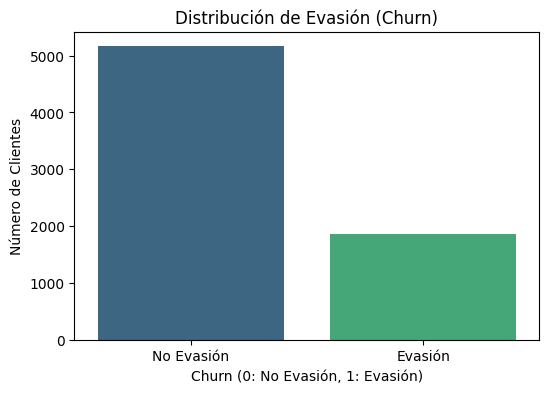


Porcentaje de Evasión:


,proportion
Churn,
0,73.421502
1,26.578498


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de conteo para la variable 'Churn'
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribución de Evasión (Churn)')
plt.xlabel('Churn (0: No Evasión, 1: Evasión)')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['No Evasión', 'Evasión']) # Etiquetar los ejes X para mayor claridad
plt.show()

# Opcional: Mostrar el porcentaje de cada categoría
churn_counts = df['Churn'].value_counts(normalize=True) * 100
print("\nPorcentaje de Evasión:")
display(churn_counts)

## Recuento de evasión por variables categóricas

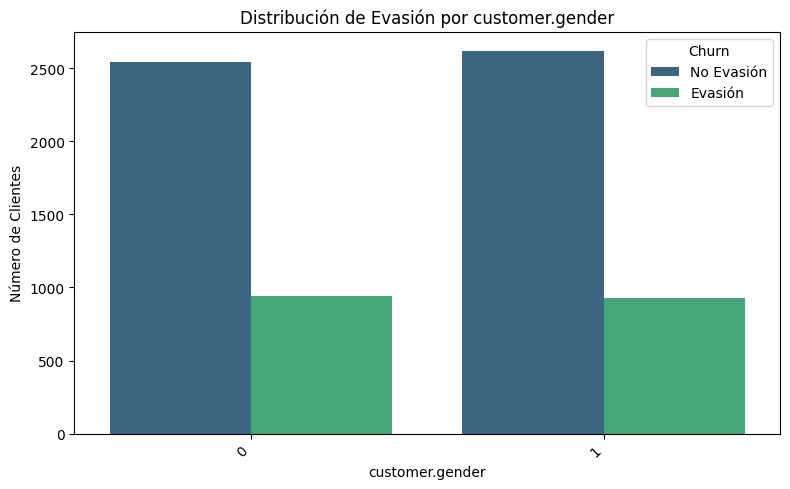

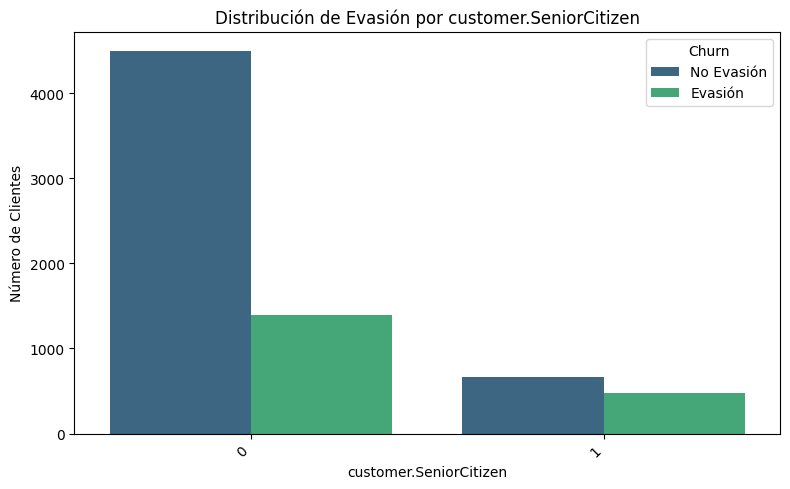

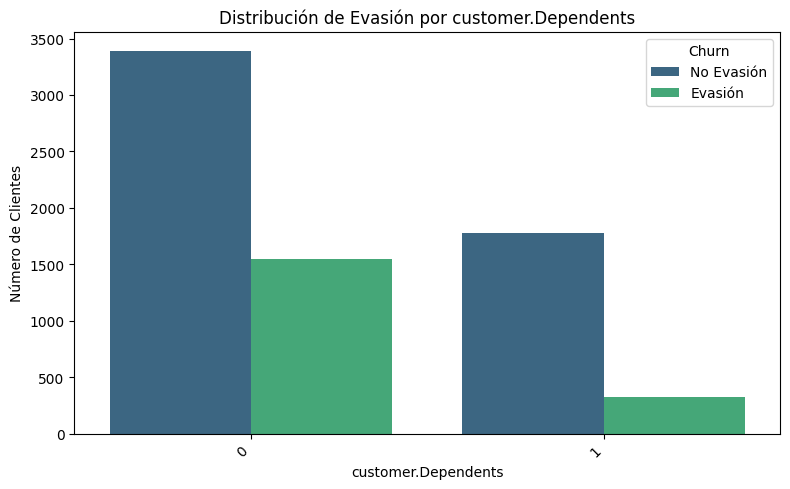

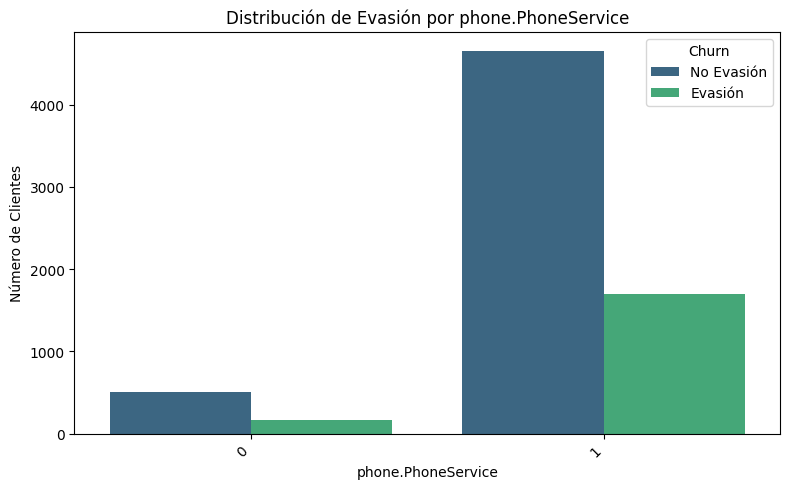

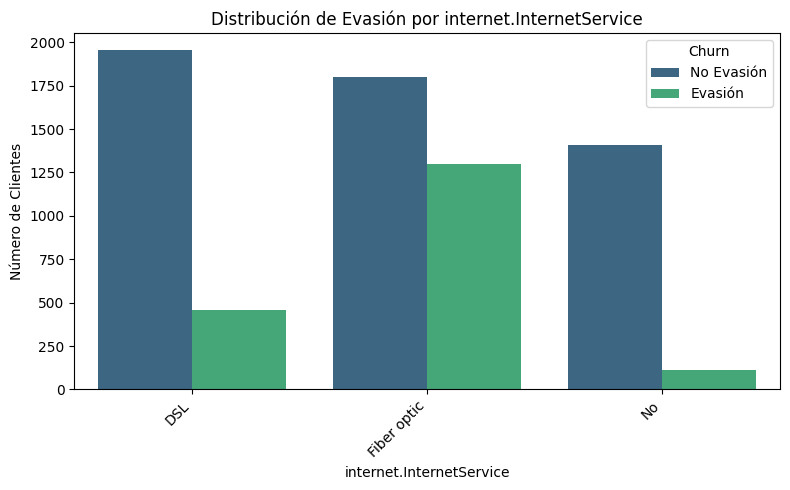

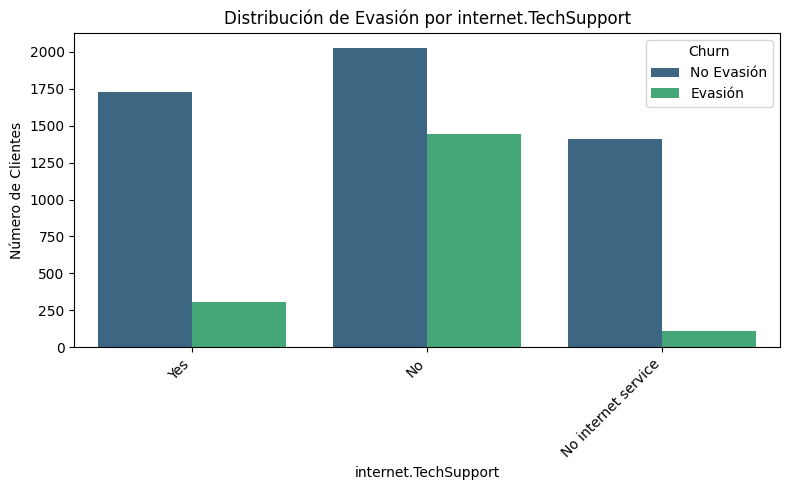

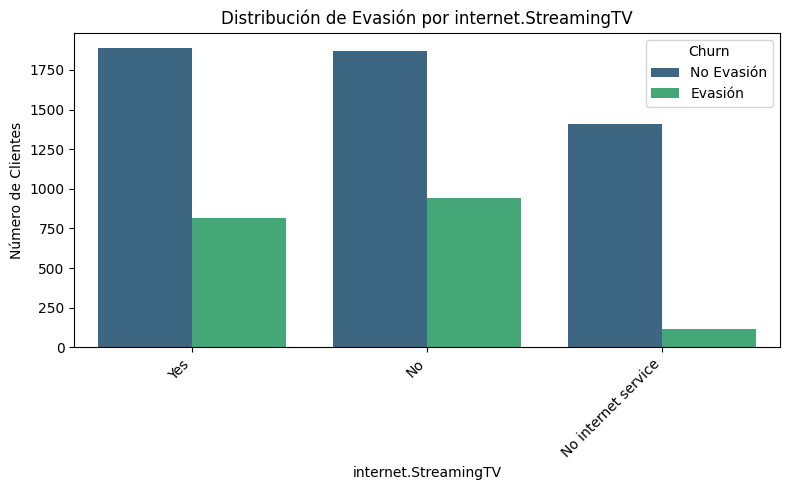

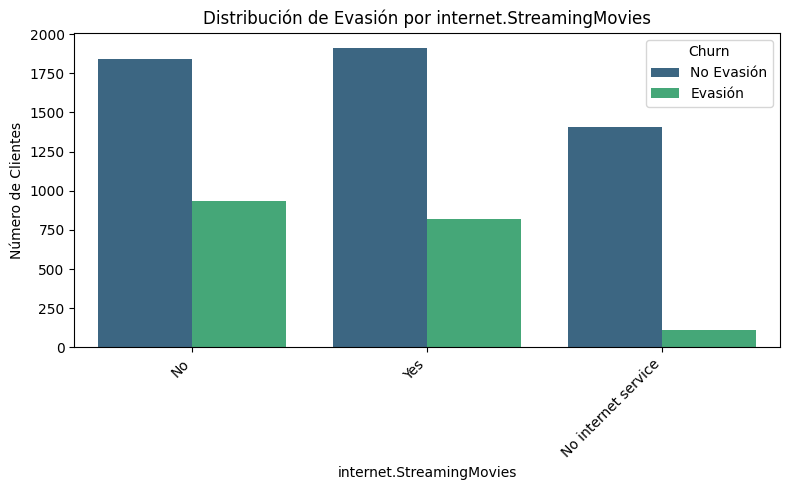

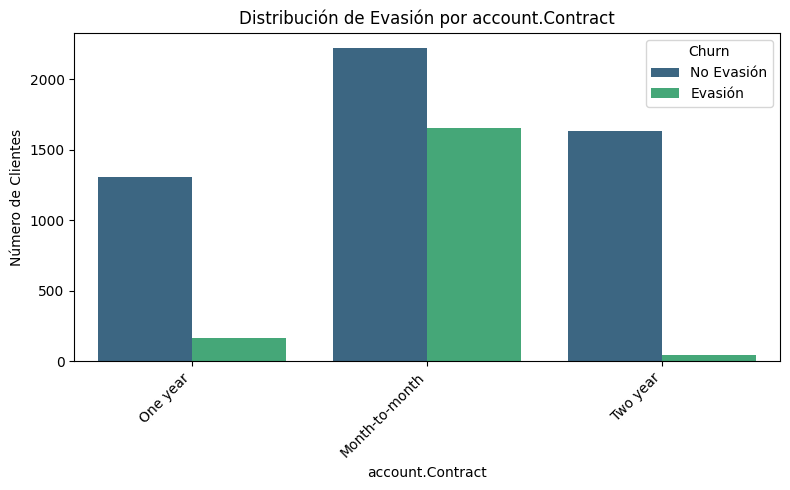

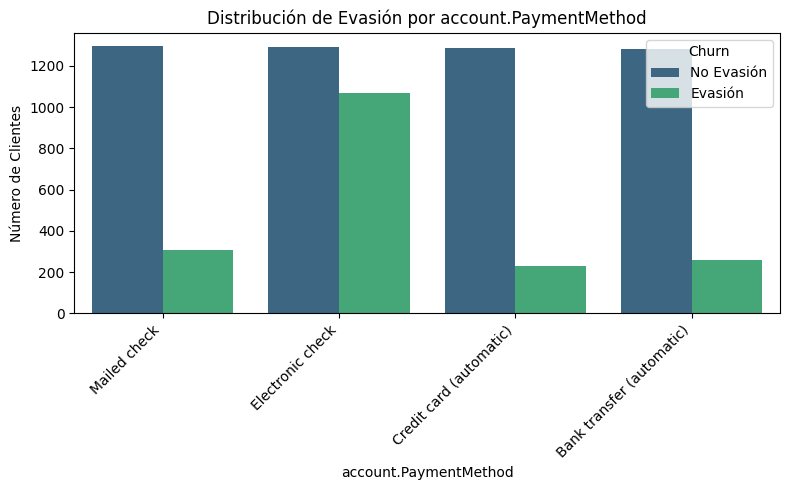

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de columnas categóricas para explorar la relación con Churn
categorical_cols_to_explore = [
    'customer.gender',
    'customer.SeniorCitizen',
    'customer.Dependents',
    'phone.PhoneService',
    'internet.InternetService',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.Contract',
    'account.PaymentMethod'
]

# Crear gráficos de conteo para cada variable categórica con Churn como hue
for col in categorical_cols_to_explore:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Churn', data=df, palette='viridis')
    plt.title(f'Distribución de Evasión por {col}')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Churn', labels=['No Evasión', 'Evasión'])
    plt.tight_layout()
    plt.show()

## Conteo de evasión por variables numéricas

/tmp/ipython-input-985173595.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='viridis')


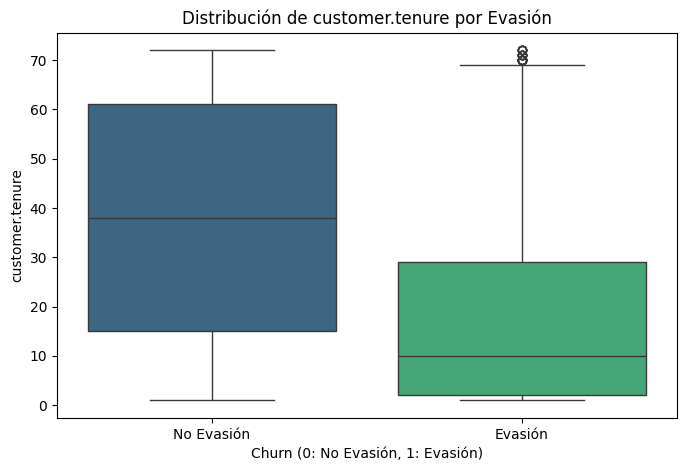

/tmp/ipython-input-985173595.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='viridis')


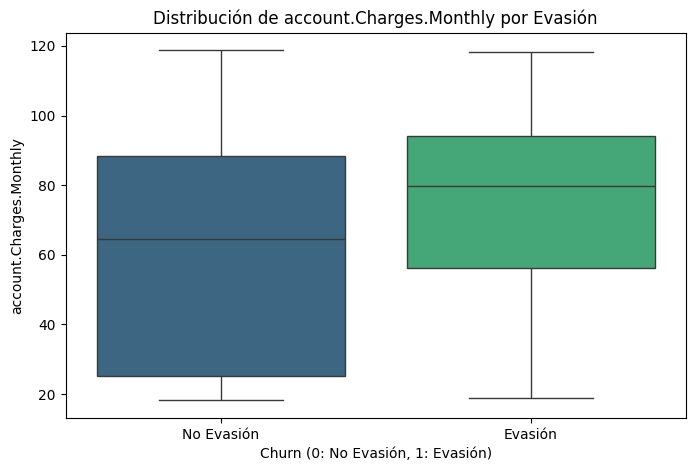

/tmp/ipython-input-985173595.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='viridis')


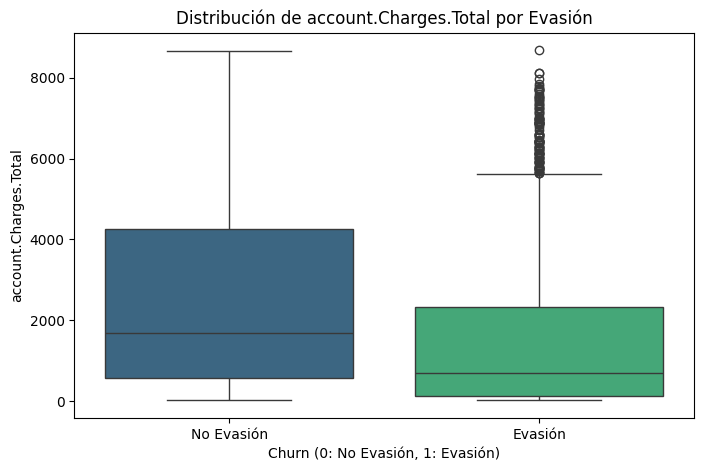

/tmp/ipython-input-985173595.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='viridis')


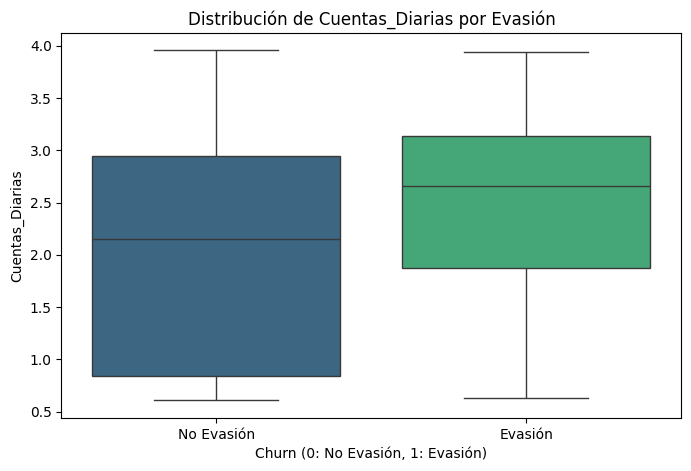

In [40]:
# Lista de columnas numéricas para explorar la relación con Churn
numerical_cols_to_explore = [
    'customer.tenure',
    'account.Charges.Monthly',
    'account.Charges.Total',
    'Cuentas_Diarias'
]

# Crear box plots para cada variable numérica con Churn en el eje x
for col in numerical_cols_to_explore:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Churn', y=col, data=df, palette='viridis')
    plt.title(f'Distribución de {col} por Evasión')
    plt.xlabel('Churn (0: No Evasión, 1: Evasión)')
    plt.ylabel(col)
    plt.xticks([0, 1], ['No Evasión', 'Evasión']) # Etiquetar los ejes X para mayor claridad
    plt.show()

#📄Informe final

# 📄 Informe Final del Análisis de Evasión de Clientes (Churn) en Telecom X

## Introducción

El presente informe documenta el análisis exploratorio de datos (EDA) realizado para comprender los factores que contribuyen a la evasión de clientes (Churn) en Telecom X. El objetivo principal es identificar patrones y obtener insights que permitan al equipo de Data Science desarrollar modelos predictivos y estrategias efectivas para reducir la pérdida de clientes.

## Limpieza y Tratamiento de Datos

La etapa de limpieza y transformación de datos fue crucial para preparar el conjunto de datos para el análisis. Los pasos clave incluyeron:

1.  **Extracción de Datos:** Los datos fueron cargados directamente desde una API en formato JSON y convertidos a un DataFrame de pandas.
2.  **Aplanamiento de Estructuras Anidadas:** Se identificaron y aplanaron columnas que contenían diccionarios anidados (`customer`, `phone`, `internet`, `account`) para facilitar el acceso a las variables individuales. Esto incluyó el manejo de la sub-llave `charges` dentro de `account`.
3.  **Identificación y Manejo de Valores Ausentes e Inconsistencias:** Se verificó la presencia de valores ausentes y duplicados en todas las columnas. Se identificaron 224 registros con valores vacíos/NaN en la columna 'Churn' y 11 registros con NaN en 'account.Charges.Total'.
4.  **Manejo de Valores Ausentes Críticos:** Las filas con valores ausentes en 'Churn' o 'account.Charges.Total' fueron eliminadas del DataFrame, resultando en un conjunto de datos limpio de 7032 registros.
5.  **Estandarización de Variables Binarias:** Columnas con valores 'Yes'/'No' y 'Female'/'Male' fueron convertidas a una representación numérica binaria (1 y 0) para facilitar el análisis cuantitativo.
6.  **Creación de Nueva Característica:** Se creó la columna 'Cuentas\_Diarias' dividiendo los cargos mensuales por un promedio de días en un mes para obtener una métrica diaria de gasto.
7.  **Verificación de Tipos de Datos:** Se confirmó que las columnas numéricas como 'account.Charges.Monthly' y 'account.Charges.Total' tuvieran el tipo de dato float adecuado.

## Análisis Exploratorio de Datos (EDA)

Se realizaron análisis exploratorios y visualizaciones para entender las distribuciones de las variables y su relación con la evasión:

*   **Distribución de Evasión:** Se visualizó la proporción general de clientes que evadieron y los que no. Aproximadamente el 26.6% de los clientes en el conjunto de datos evadieron.

*   **Evasión por Variables Categóricas:** Se examinó la tasa de evasión a través de diferentes categorías de variables como tipo de contrato, servicio de internet, método de pago, etc. Los análisis revelaron, por ejemplo, que los clientes con contratos mes a mes tienen una tasa de evasión significativamente mayor que aquellos con contratos a largo plazo. El tipo de servicio de internet y el método de pago también mostraron diferencias notables en las tasas de evasión.

*   **Evasión por Variables Numéricas:** Se exploró la distribución de variables numéricas como el tiempo de contrato (`customer.tenure`) y los cargos (`account.Charges.Monthly`, `account.Charges.Total`, `Cuentas_Diarias`) para clientes que evadieron y los que no. Los box plots sugieren que los clientes que evaden tienden a tener un tiempo de contrato más corto y, en promedio, cargos mensuales y totales más altos en comparación con los clientes que no evaden.

## Conclusiones e Insights

Los principales hallazgos del análisis son:

*   La tasa de evasión general en Telecom X es significativa.
*   El **tipo de contrato** es uno de los predictores más fuertes de la evasión, con clientes de contrato mes a mes siendo mucho más propensos a cancelar.
*   Los **servicios de internet** (especialmente Fibra Óptica) y los **servicios adicionales** (como soporte técnico y seguridad en línea) parecen estar relacionados con la evasión. Los clientes sin estos servicios o con ciertos tipos de servicio podrían tener una mayor probabilidad de irse.
*   El **tiempo de contrato** (`customer.tenure`) está inversamente relacionado con la evasión; los clientes con menos tiempo en la empresa son más propensos a cancelar.
*   Los **cargos mensuales y totales** son más altos para los clientes que evaden, lo que podría indicar que el costo es un factor importante.
*   El **método de pago** también muestra diferencias en las tasas de evasión, sugiriendo que la facilidad o el recordatorio del pago pueden influir.
